In [1]:
import pandas as pd
cluster = pd.read_csv('cluster_data.csv',
                     names = ["sepal length", "sepal width","petal length", "petal width"])

In [2]:
cluster.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print('Rows:', cluster.shape[0], ' Colomns: ', cluster.shape[1])

Rows: 156  Colomns:  4


In [4]:
cluster.describe()

,sepal length,sepal width,petal length,petal width
count,156.000000,156.000000,156.000000,156.000000
mean,8.169872,4.282692,5.191026,1.691026
std,11.788280,6.263969,8.036733,2.986213
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.350000
75%,6.500000,3.400000,5.200000,1.900000
max,76.000000,42.000000,59.000000,23.000000


In [5]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  156 non-null    float64
 1   sepal width   156 non-null    float64
 2   petal length  156 non-null    float64
 3   petal width   156 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


In [6]:
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12)

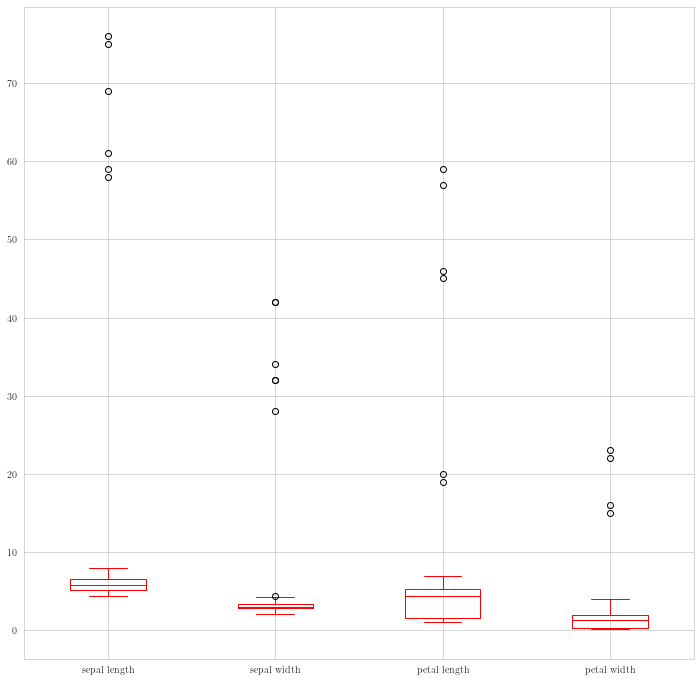

In [7]:
#boxplots before cleaning data
cluster.boxplot(figsize = (12, 12), color = 'red')

In [8]:
#remove outliers
Q1 = cluster.quantile(0.25)
Q3 = cluster.quantile(0.75)
IQR = Q3 - Q1

cluster = cluster[~((cluster < (Q1 - 2.5 * IQR)) |(cluster > (Q3 + 2.5 * IQR))).any(axis=1)]
cluster

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
150,6.7,3.0,5.2,2.3
151,6.3,2.5,5.0,1.9
152,6.5,3.0,5.2,2.0
153,6.2,3.4,5.4,2.3


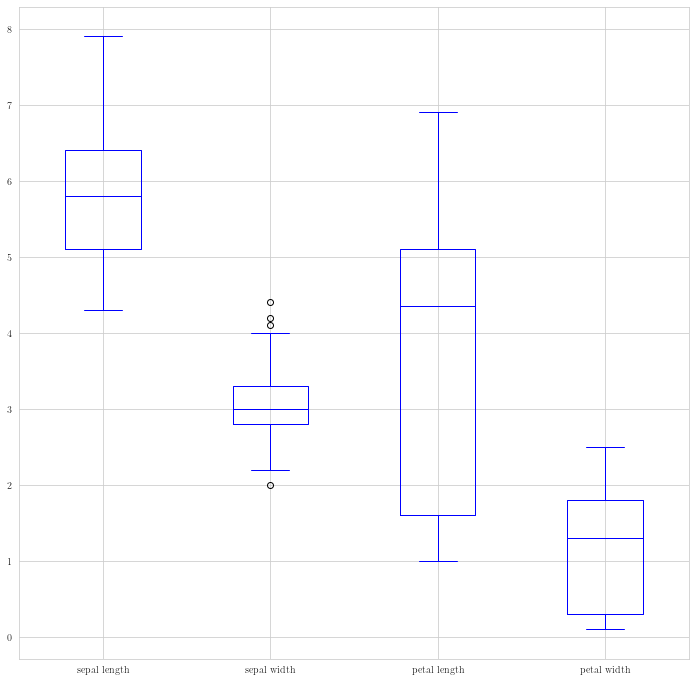

In [9]:
#boxplots After cleaning data
cluster.boxplot(figsize = (12, 12), color = 'blue')

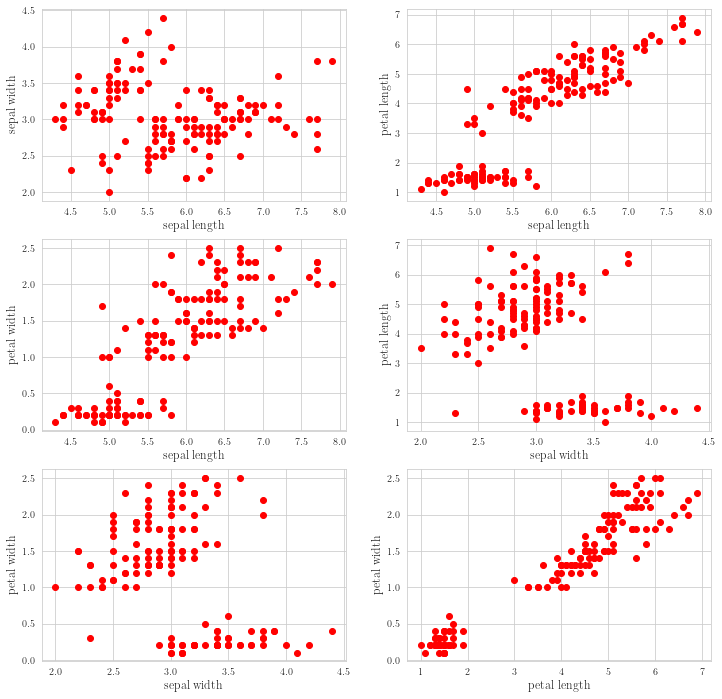

In [10]:
#scatter plots
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(cluster[cluster.columns[i]], cluster[cluster.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(cluster.columns[i])
        axes[ax1][ax2].set_ylabel(cluster.columns[j])
        index = index + 1

In [11]:
#KMeans
from sklearn.cluster import KMeans
x = cluster.iloc[:,[0,1,2,3]].values
K=3

clf = KMeans(n_clusters=K)
clf.fit(x)
print(clf.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


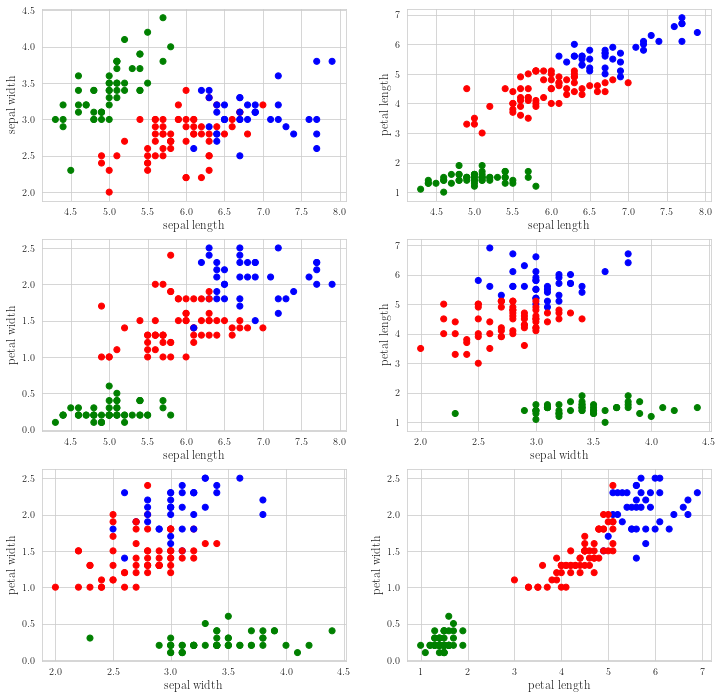

In [12]:
import numpy as np
colors = np.array(['red','green','blue'])
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(cluster[cluster.columns[i]], cluster[cluster.columns[j]], color=colors[clf.labels_])
        axes[ax1][ax2].set_xlabel(cluster.columns[i])
        axes[ax1][ax2].set_ylabel(cluster.columns[j])
        index = index + 1

In [13]:
x = [[7,3,6,2]]
y_pred = clf.predict(x)
print(y_pred)

[2]
